In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [58]:
import seaborn as sns
import seaborn.objects as so
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from setup.data_wrangle import *
from setup.setup import *
from analysis.analysis import *


In [4]:
# create_cases(AIRBOUNDARY_FOLDER)

In [9]:
cases = retrieve_cases(AIRBOUNDARY_FOLDER)
sc = cases[2]
sc

CaseData(case_name='red_b1', idf=<geomeppy.idf.IDF object at 0x11f484b50>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/airboundary/case_red_b1/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_red_b1'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/airboundary/case_red_b1'))

In [49]:
df_rate = create_zone_rate_df(sc)
df_rate2 = df_rate.with_columns(time=pl.col("datetimes").dt.to_string("%H:%M"))
df_rate2

case_names,space_names,datetimes,qoi,values,time
str,str,datetime[μs],str,f64,str
"""red_b1""","""BLOCK 00 STOREY 0""",2017-07-01 00:00:00,"""AFN Zone Ventilation Sensible …",0.0,"""00:00"""
"""red_b1""","""BLOCK 00 STOREY 0""",2017-07-01 00:15:00,"""AFN Zone Ventilation Sensible …",0.0,"""00:15"""
"""red_b1""","""BLOCK 00 STOREY 0""",2017-07-01 00:30:00,"""AFN Zone Ventilation Sensible …",0.0,"""00:30"""
"""red_b1""","""BLOCK 00 STOREY 0""",2017-07-01 00:45:00,"""AFN Zone Ventilation Sensible …",0.0,"""00:45"""
"""red_b1""","""BLOCK 00 STOREY 0""",2017-07-01 01:00:00,"""AFN Zone Ventilation Sensible …",0.0,"""01:00"""
…,…,…,…,…,…
"""red_b1""","""BLOCK 09 STOREY 0""",2017-07-01 22:45:00,"""AFN Zone Mixing Sensible Heat …",0.0,"""22:45"""
"""red_b1""","""BLOCK 09 STOREY 0""",2017-07-01 23:00:00,"""AFN Zone Mixing Sensible Heat …",0.0,"""23:00"""
"""red_b1""","""BLOCK 09 STOREY 0""",2017-07-01 23:15:00,"""AFN Zone Mixing Sensible Heat …",0.0,"""23:15"""


In [46]:
# res = df_rate.filter(
#     pl.col("qoi").dt.to_string("%H:%M").alias("time"),


# )

Text(0, 0.5, 'Rate [W]')

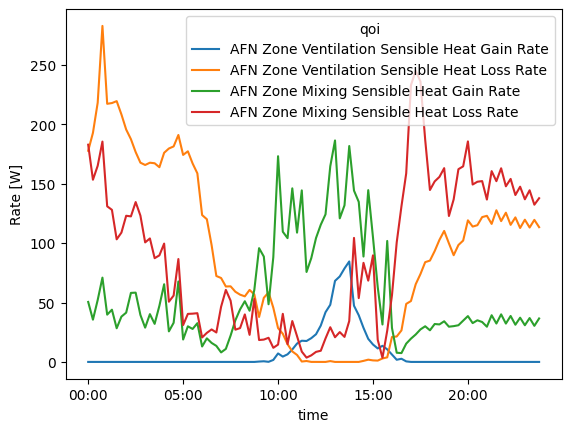

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1,)
sns.lineplot(data=df_rate2, y="values", x="time", hue="qoi", ax=ax, errorbar=None)
# sns.lineplot(data=df_rate2, x="time", y="values_0")
ax.xaxis.set_ticks_position("bottom")
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.set_ylabel("Rate [W]")

# ax.set_xticklabels(rotation=-90, labels=df_rate2["time"])

# TODO - use plotly, and use different line markers.. 

In [ ]:
# site data.. 